In [2]:
from neo4j import GraphDatabase
import pandas as pd
import numpy as np

In [3]:
uri = "bolt://34.101.192.24:7687"
username = "neo4j"
password = "unej1234"

driver = GraphDatabase.driver(uri, auth=(username, password))

In [4]:
def extract_node_properties():
    with driver.session() as session:
        # Cypher query to fetch node properties
        query = """
        MATCH (n)
        RETURN n.Vector AS vector, n.label AS label, labels(n) AS kelas, n.abstract AS keterangan
        """
        result = session.run(query)
        # Extract properties and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        return df


In [5]:
node_df = extract_node_properties()
cleaned_kelas = node_df['kelas'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
node_df['kelas'] = cleaned_kelas
node_df

,vector,label,kelas,keterangan
0,"[0.03639092668890953, -0.024370986968278885, -...",Metalaxyl,[Fungisida],Metalaxyl adalah sejenis fungisida yang diguna...
1,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],"Penyakit gosong bulir padi, juga dikenal sebag..."
2,"[0.032646406441926956, -0.04352227970957756, 0...",Laba laba,[Biologis],Laba-laba adalah predator umum yang dapat mema...
3,"[0.036355093121528625, 0.043446771800518036, 0...",Trichogramm,[Biologis],Trichogramma atau parasitoid terkait hadir ada...
4,"[0.036346133798360825, -0.03959878906607628, -...",Acidovorax avenae subsp. avenae,[PatogenPadi],Acidovorax avenae subsp. avenae adalah bakteri...
...,...,...,...,...
138,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[HamaPadi],Penggerek batang kuning merupakan jenis serang...
139,"[0.03915003314614296, -0.04633839428424835, 0....",Klorpiris,[Pestisida],Klorpirifos adalah insektisida organofosfat. K...
140,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[HamaPadi],Rayap dapat menyerang tanaman di semua tahap p...
141,"[0.03916794806718826, 0.019752727821469307, 0....",Daun berkarat,[Gejala],Daun berkarat (pastula) berwarna kuning hingga...


In [6]:
def extract_node_properties_and_relationships():
    with driver.session() as session:
        # Cypher query to fetch node properties and relationships
        query = """
            MATCH (n)-[r]->(m)
            RETURN n.Vector AS source_vector, n.label AS source_label, labels(n) AS source_class, 
                type(r) AS relationship_type,
                m.Vector AS target_vector, m.label AS target_label, labels(m) AS target_class
        """
        result = session.run(query)
        # Extract properties and relationships and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        # Clean labels
        df['source_class'] = df['source_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        df['target_class'] = df['target_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        return df

# Call the function to extract node properties and relationships
Rice_KG_df = extract_node_properties_and_relationships()

# Print the DataFrame
Rice_KG_df


,source_vector,source_label,source_class,relationship_type,target_vector,target_label,target_class
0,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.03818255290389061, -0.015258912928402424, -...",Bulir terdapat bercak,[Gejala]
1,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.03753756731748581, 0.005460740067064762, -0...",Bulir pecah,[Gejala]
2,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.03612148016691208, 0.0048484764993190765, 0...",Bulir berubah warna,[Gejala]
3,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],terkenaPatogen,"[0.03752860799431801, 0.022415179759263992, 0....",Tilletia barclayana,[PatogenPadi]
4,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],diberikanFungisida,"[0.03760923072695732, -0.030174778774380684, 0...",Pyraclostrobin,[Fungisida]
...,...,...,...,...,...,...,...
249,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[HamaPadi],memilikiGejala,"[0.038021307438611984, -0.010079000145196915, ...",Malai terdapat bercak,[Gejala]
250,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[HamaPadi],memilikiGejala,"[0.033894460648298264, -0.014245453290641308, ...",Daun terdapat bercak,[Gejala]
251,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[HamaPadi],memilikiGejala,"[0.03758235648274422, 0.02068854123353958, 0.0...",Batang rapuh,[Gejala]
252,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[HamaPadi],memilikiGejala,"[0.03786005824804306, -0.004899086430668831, 0...",Akar berlubang,[Gejala]


In [7]:
def extract_node_properties_and_relationships():
    with driver.session() as session:
        # Cypher query to fetch node properties and relationships
        query = """
        MATCH (n)-[r]->(m)
            WHERE any(label IN labels(n) WHERE label IN ['Gejala', 'PenyakitPadi', 'HamaPadi']) 
            AND any(label IN labels(m) WHERE label IN ['Gejala', 'PenyakitPadi', 'HamaPadi'])
        RETURN 
        m.Vector AS source_vector, m.label AS source_label, labels(m) AS source_class, 
        type(r) AS relationship_type,
        n.Vector AS target_vector, n.label AS target_label, labels(n) AS target_class

        """
        result = session.run(query)
        # Extract properties and relationships and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        # Clean labels
        df['source_class'] = df['source_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        df['target_class'] = df['target_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        return df

# Call the function to extract node properties and relationships
Rice_KG_df = extract_node_properties_and_relationships()

# Print the DataFrame
Rice_KG_df


,source_vector,source_label,source_class,relationship_type,target_vector,target_label,target_class
0,"[0.03818255290389061, -0.015258912928402424, -...",Bulir terdapat bercak,[Gejala],memilikiGejala,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi]
1,"[0.03753756731748581, 0.005460740067064762, -0...",Bulir pecah,[Gejala],memilikiGejala,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi]
2,"[0.03612148016691208, 0.0048484764993190765, 0...",Bulir berubah warna,[Gejala],memilikiGejala,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi]
3,"[0.03656195476651192, 0.02377898246049881, 0.0...",Bulir mengalami kerusakan,[Gejala],memilikiGejala,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi]
4,"[0.038021307438611984, -0.010079000145196915, ...",Malai terdapat bercak,[Gejala],memilikiGejala,"[0.03643496334552765, -0.020186755806207657, -...",Garis Merah,[PenyakitPadi]
...,...,...,...,...,...,...,...
131,"[0.038021307438611984, -0.010079000145196915, ...",Malai terdapat bercak,[Gejala],memilikiGejala,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[HamaPadi]
132,"[0.033894460648298264, -0.014245453290641308, ...",Daun terdapat bercak,[Gejala],memilikiGejala,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[HamaPadi]
133,"[0.03758235648274422, 0.02068854123353958, 0.0...",Batang rapuh,[Gejala],memilikiGejala,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[HamaPadi]
134,"[0.03786005824804306, -0.004899086430668831, 0...",Akar berlubang,[Gejala],memilikiGejala,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[HamaPadi]


In [8]:
#Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Concatenate source and target vectors as features
X = np.concatenate([Rice_KG_df['source_vector'].values.tolist(), Rice_KG_df['target_vector'].values.tolist()], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)


Accuracy: 0.8536585365853658


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Assuming Rice_KG_df is a pandas DataFrame
# Extract features and target variable
source_vectors = np.array(Rice_KG_df['source_vector'].tolist())
target_vectors = np.array(Rice_KG_df['target_vector'].tolist())
relationship_types = Rice_KG_df['relationship_type'].values

# Encode relationship types
label_encoder = LabelEncoder()
encoded_relationship_types = label_encoder.fit_transform(relationship_types)

# Concatenate source vectors and encoded relationship types to form X
X = np.concatenate([source_vectors, encoded_relationship_types.reshape(-1, 1)], axis=1)

# Use KMeans clustering to convert target vectors into discrete classes
n_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(target_vectors)
y = kmeans.labels_

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model with multiple metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
rf_conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:\n", rf_conf_matrix)

# Optionally, use cross-validation for a better estimate of performance
cross_val_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", cross_val_scores.mean())


c:\Users\Ariful\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ariful\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Accuracy: 0.17073170731707318
Precision: 0.16531165311653118
Recall: 0.17073170731707318
F1 Score: 0.1661617458279846
Confusion Matrix:
 [[0 0 1 1 1]
 [0 0 2 2 1]
 [2 0 1 4 3]
 [1 1 3 2 3]
 [0 1 2 6 4]]
Cross-validated Accuracy: 0.2798941798941799


In [10]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Encode categorical variables if needed
label_encoder = LabelEncoder()
X_encoded = X.copy()  # Make a copy of X to avoid modifying the original data
for i in range(X_encoded.shape[1]):  # Iterate over columns (features)
    X_encoded[:, i] = label_encoder.fit_transform(X_encoded[:, i])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)


Accuracy: 0.12195121951219512


In [11]:
#Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Concatenate source and target vectors as features
X = np.concatenate([Rice_KG_df['source_vector'].values.tolist(), Rice_KG_df['target_vector'].values.tolist()], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, nn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", nn_accuracy)


Epoch 1/100


c:\Users\Ariful\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4083 - loss: 1.7717  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.9599 - loss: 1.7073
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9259 - loss: 1.6381  
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9133 - loss: 1.5482
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9330 - loss: 1.4186  
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9644 - loss: 1.2377
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9565 - loss: 1.0497  
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9233 - loss: 0.8742 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9220 - loss: 0.6881  
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9280 - loss: 0.5054 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9459 - loss: 0.3604 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9294 - loss: 0.3769

In [12]:
#CNN

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout

# Reshape the input data to be suitable for a 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, cnn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", cnn_accuracy)


Epoch 1/100


c:\Users\Ariful\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5650 - loss: 1.7795   
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9074 - loss: 1.7069 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9129 - loss: 1.5511  
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9323 - loss: 1.2407 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8996 - loss: 0.8730 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9151 - loss: 0.4880 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8996 - loss: 0.5080 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9337 - loss: 0.4059  
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.9375 - loss: 0.4113
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9263 - loss: 0.3835  
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.9343 - loss: 0.3715
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9185 - loss: 0.404

In [13]:
#RNN

from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

# Function to safely evaluate a string representation of a list
def safe_eval(x):
    if isinstance(x, str):
        return ast.literal_eval(x)
    return x

# Apply the safe_eval function to convert vector columns from string to list (if necessary)
Rice_KG_df['source_vector'] = Rice_KG_df['source_vector'].apply(safe_eval)
Rice_KG_df['target_vector'] = Rice_KG_df['target_vector'].apply(safe_eval)

# Concatenate source and target vectors as features
source_vectors = np.array(Rice_KG_df['source_vector'].tolist())
target_vectors = np.array(Rice_KG_df['target_vector'].tolist())
X = np.concatenate([source_vectors, target_vectors], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Reshape data for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine the number of unique classes
num_classes = len(np.unique(y))

# Build the RNN model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, rnn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", rnn_accuracy)


Epoch 1/100


c:\Users\Ariful\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - accuracy: 0.5025 - loss: 1.7863
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9359 - loss: 1.7613 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9194 - loss: 1.7343  
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.9116 - loss: 1.7050
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9278 - loss: 1.6687  
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.9389 - loss: 1.6274
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9018 - loss: 1.5914 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 147us/step - accuracy: 0.9282 - loss: 1.5342
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9291 - loss: 1.4778 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.9345 - loss: 1.4143
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9255 - loss: 1.3553 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.9217 - loss: 1.2829

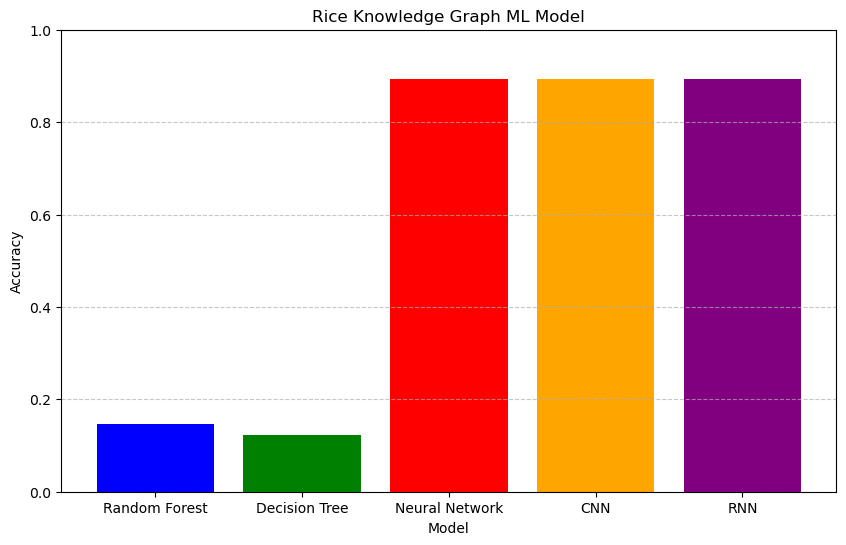

In [14]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores of four other models stored in variables

# Define the model names
model_names = ['Random Forest', 'Decision Tree', 'Neural Network', 'CNN', 'RNN']

# Define the accuracy scores
accuracy_scores = [rf_accuracy, dt_accuracy, nn_accuracy, cnn_accuracy, rnn_accuracy]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Rice Knowledge Graph ML Model')
plt.ylim(0, 1)  # Set the y-axis limits to ensure all bars are visible
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
